# Two Line Element Predictor

# Contents
- [What is Two Line Element?](#What-is-Two-Line-Element?) <br>
- [Problem Statement](#Problem-Statement) <br>
- [Cry Wolves](#Cry-Wolves) <br>
- [Data Acquistion](#Data-Acquisition) <br>
- [Pre-Processing](#Pre-Processing) <br>
- [Training](#Training) <br>
- [Prediction](#Prediction)

# What is Two Line Element?
[Back to Content Page](#Contents)<br>
[Two Line Elements (TLE)](https://en.wikipedia.org/wiki/Two-line_element_set)[1] is a data format widely used to track objects orbiting Earth. Encoded in the TLE is the 6-D state vectors, [BSTAR](https://en.wikipedia.org/wiki/BSTAR)[2] drag term, first and second derivative of the mean motion, and other miscellaneous of the object. <br>

In this notebook we are interested predicting TLE for a given satellite. We would be using a Linear Regression Line trained on past data TLE data. 

# Problem Statement
[Back to Content Page](#Contents)<br>
## First Reported payload to payload collision
On February 10, 2009, the satellite communications company Iridium lost contact with one of its spacecraft, Iridium 33. Earlier that day, Iridium had received a prediction of a close approach of 584 m (1,916 ft) between Iridium 33 and another orbiting spacecraft, the non-operational Russian communications satellite Cosmos 2251. Iridium had received close approach reports before, and the one on February 10 was not particularly alarming or deemed a “top predicted close approach” compared to other predicted close-approach events for that week. Nevertheless, at the time the close approach was predicted to occur above northern Siberia, Iridium abruptly stopped receiving telemetry from its spacecraft [4]. <br>

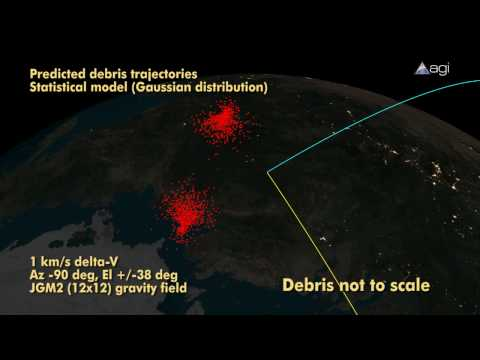

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('_o7EKlqCE20', width = 1000, height= 600)

# Cry Wolves
[Back to Content Page](#Contents)<br>
So prior to the collision, there were report indicating this conjunction. But this was ignored as it was not deemed a “top predicted close approach” compared to other predicted close-approach events for that week[4]. <br>
The main reason why there is so many cry wolves is that measurement of the TLE has inherent errors and the propogation models (based on atmospheric modeling, newton mechanics and other earth forces) such as SGP4 would propagate these error through time. <br>
For example, if the momentum vector has an average uncertainity of $\pm 10$ km/h, after a day of propagation, this uncertainty would be $\pm 240$ km/h which is not very ideal. Typically, the state vectors generated from the propagation model would not be valid after a day and would be discarded. Common practice would be to get a fresh TLE to simulate the satellite passes.

# Data Acquisition
[Back to Content Page](#Contents)<br>
The TLE downloaded from Celestrak[3], which is maintained by North American Aerospace Defense Command (NORAD), where they have database of TLE for all the registered satellites. <br>
Fresh TLE are updated to the database twice daily. Such high cadence opens up the option for... **<span style="font-size:30;">MACHINE LEARNING</span>** <br>

Disclaimer: <br>
This is just a toy concept to test out a statistical approach to predict TLE instead of the conventional propagation model. As the cadence of TLE updates is high (~ twice daily), this source of data is suitable for times series analysis or machine learning techniques. In this repo, I would present a simple Linear Regression to predict TLE. As the regression model does not factor in physical laws of Newtonian, the above mentioned error propagation through time of the momentum should not apply. No rigourious proving is done to show my method is more superior than the current propogation models.

In [1]:
# Importing the right packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from src.tle import readTLE, plotTLE
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

In [2]:
# Setting the paths right
home_path = os.getcwd()[:-9]
data_path = os.path.join(home_path, 'data')
os.listdir(data_path)

['sat41167.txt',
 'sat41169.txt',
 'sat41169test27junto7jul.txt',
 'sat39227.txt',
 'testT16Jul17.txt']

Reading the data for '/home/renjie/Documents/GitHub/TLE-reproducible/TLE/data/sat41167.txt'... Please wait...


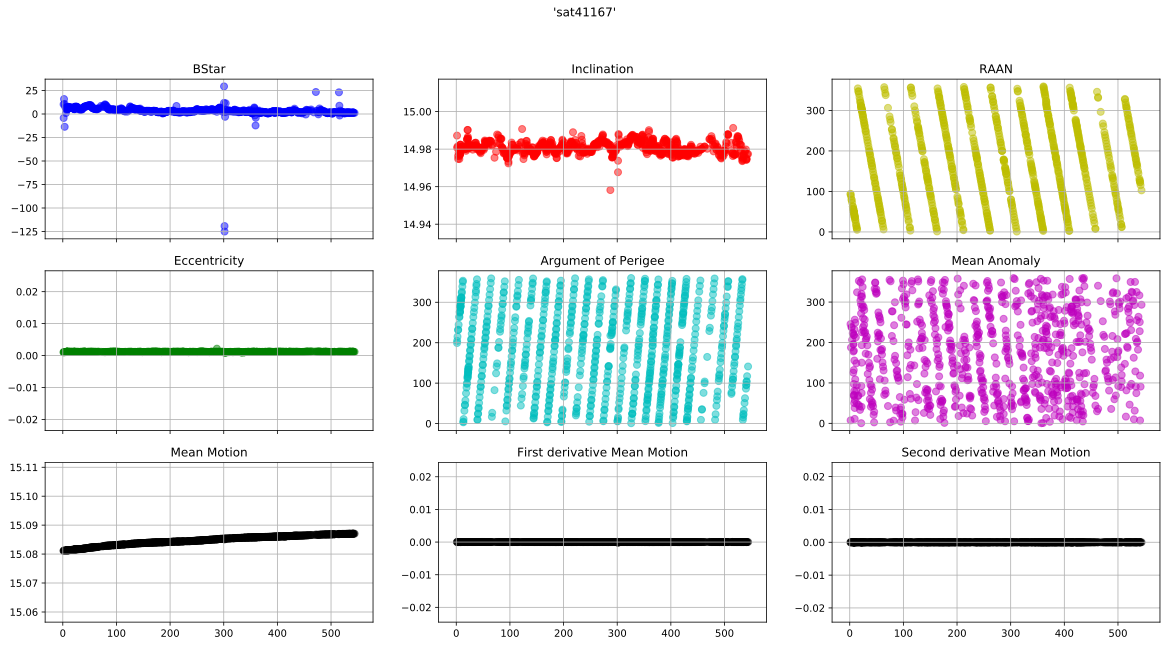

In [3]:
# sat1 = readTLE(os.path.join(data_path, 'sat41167.txt'))
plotTLE(os.path.join(data_path, 'sat41167.txt'), plot = True, angleUnwrapped=False)

# Pre-Processing
[Back to Content Page](#Contents)<br>
From the plot, we note that angle quantities such as Argument of Perigee, RAAN and Mean Anomaly are periodic and bounded between $0^{0}$ to $360^{0}$ <br>
To train a Linear Regression Line, we would need need to unwrap them.

Reading the data for '/home/renjie/Documents/GitHub/TLE-reproducible/TLE/data/sat41167.txt'... Please wait...


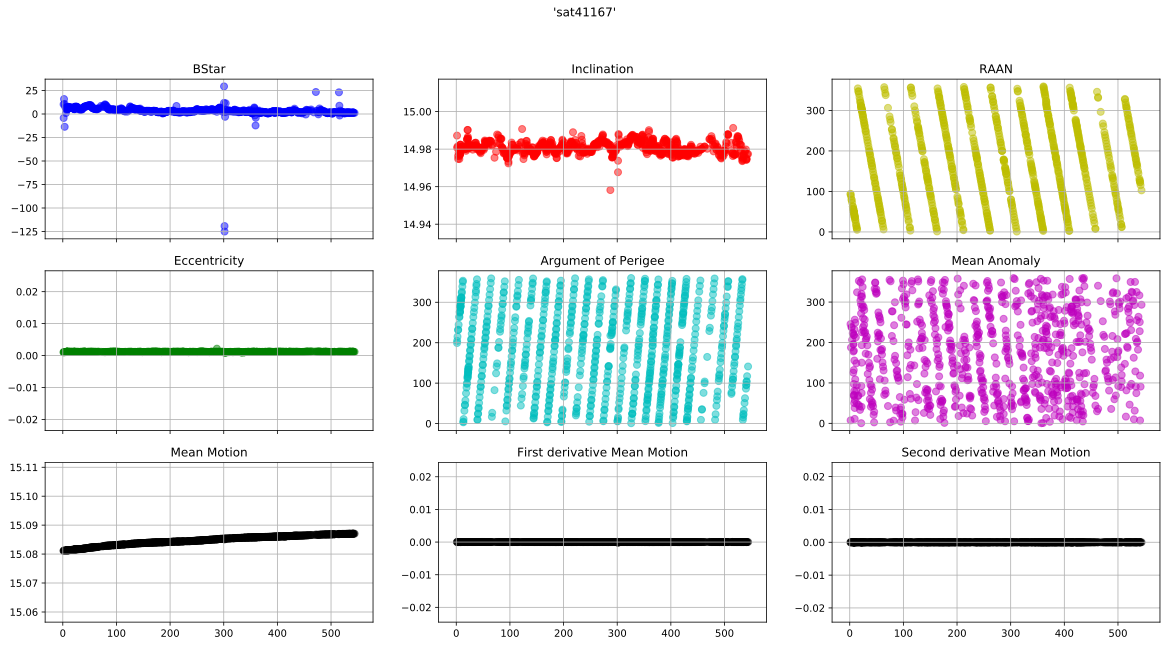

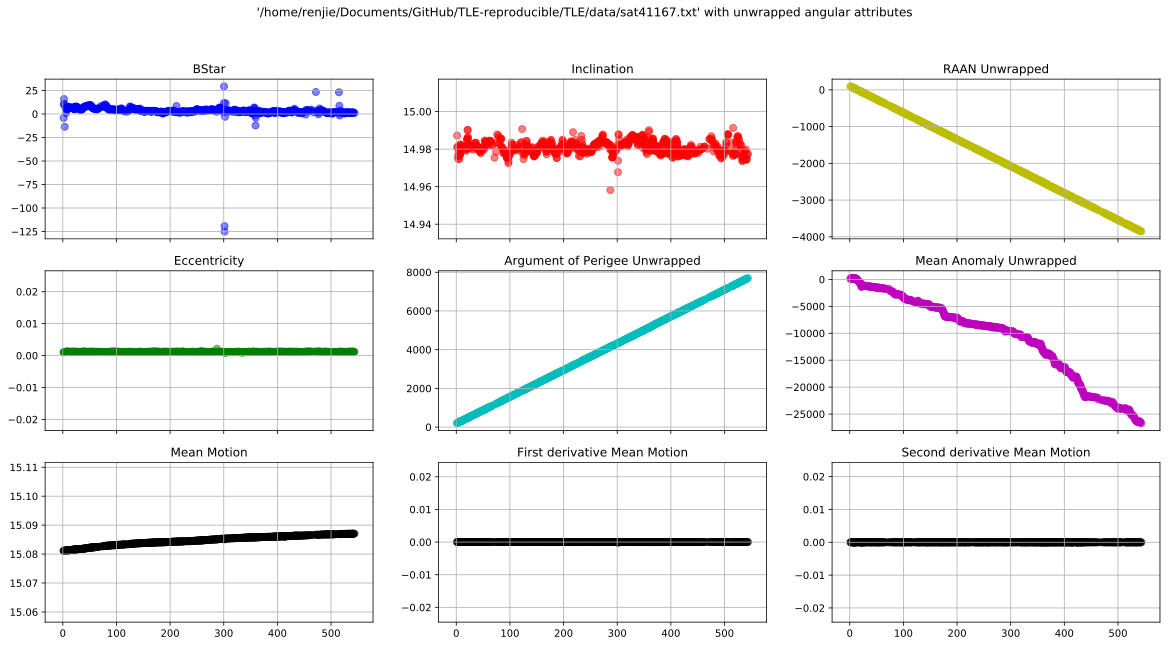

In [4]:
plotTLE(os.path.join(data_path, 'sat41167.txt'), plot = True, angleUnwrapped=True)

# Training
[Back to Content Page](#Contents)<br>
We can now start the training. <br>
We would drop $\frac{dM}{dt}$ and $\frac{d^2M}{dt^2}$ as they are almost zero for this case.

In [3]:
import src.predictor as predictor
# train_data = readTLE(os.path.join(data_path, 'sat41167.txt'))
# predictor.predictTLELinearReg(train_data, plotLines= True, getStats=False)

# Prediction
[Back to Content Page](#Contents)<br>

In [ ]:
predictor.predict(os.path.join(data_path, 'sat41169.txt'),
            os.path.join(data_path, 'sat41169test27junto7jul.txt'))

dataEpoch is : -------------- [37.75550126 37.82725461 37.82725461 37.82725461 38.48951988]
Training Linear Regression model...
Epoch:  0 Error:  104.05139200513877 New m:  0.036423922670868754 New b:  0.16791529701952723
Epoch:  10000 Error:  25.159068010965402 New m:  -0.02003978416464309 New b:  13.743679519376604
Training Linear Regression model...
Epoch:  0 Error:  224.40675592425492 New m:  0.07995405133501707 New b:  0.2996042384378212
Epoch:  10000 Error:  6.694655340144891e-06 New m:  4.805645472098305e-07 New b:  14.980083676089066
Training Linear Regression model...
Epoch:  0 Error:  1.1561046628776979e-06 New m:  5.708687903381244e-06 New b:  2.1489430626927025e-05
Epoch:  1000 Error:  1.5661880665453906e-09 New m:  -2.8078532444178548e-08 New b:  0.001079307709819266
Training Linear Regression model...
Epoch:  0 Error:  227.65379396146093 New m:  0.08054075569598339 New b:  0.3017640007046249
Epoch:  10000 Error:  3.839621800994726e-07 New m:  2.5186663355152664e-05 New b: